In [1]:
from sklearn import tree
import graphviz 
import pydotplus
import pandas as pd
import numpy as np

In [2]:
#load data
data_df = pd.read_csv("../db/stock_data_with_forward_perf.csv")
print(data_df.columns)
data_df.head()

Index(['name', 'ticker', 'Quarter end', 'Shares', 'Shares split adjusted',
       'Split factor', 'Assets', 'Current Assets', 'Liabilities',
       'Current Liabilities', 'Shareholders equity',
       'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio', 'mktcap_revenue_value', '

,name,ticker,Quarter end,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,...,two_quarter_return,one_year_return,two_year_return,three_year_return,four_year_return,five_year_return,seven_year_return,ten_year_return,twelve_year_return,fifteen_year_return
0,Alcoa Corporation,AA,2018-03-31,482832111,482832111,1,18219000000,5895000000,12937000000,2802000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alcoa Corporation,AA,2017-12-31,482772252,482772252,1,18718000000,6378000000,13794000000,2824000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alcoa Corporation,AA,2017-09-30,481324177,481324177,1,19237000000,6148000000,13276000000,2677000000,...,9.329564,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alcoa Corporation,AA,2017-06-30,441030999,441030999,1,19106000000,6033000000,13353000000,2658000000,...,2.460317,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alcoa Corporation,AA,2017-03-31,440826482,440826482,1,20157000000,6710000000,14662000000,2587000000,...,2.392539,10.948905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#specify the features(measures) and target (label) to be used

import collections

#get features data to be used. Change for comparing for selected parameters
parameters_columns = ['EPS basic','ROE','ROA', 'P/B ratio', 'P/E ratio', 'Dividend payout ratio',
                   'Long-term debt to equity ratio', 'Equity to assets ratio', 'Free cash flow per share',
                   'Current ratio', 'mktcap_revenue_value', 'mktcap_free_cash_flow_value',
                   'mktcap_cash_value', 'cash_oper_gt_earnings_value',
                   'entvalue_earnings_value', 'marketcap_bookvalue_value']

#set target values
target_values = ['no','yes']


#change for selected different investment period
selected_target_column = 'one_year_return'

#set calculated values whether a stock is a buy (1) or not (2). Standard  used is 5% for each year, so 5% for a year, 15% for 3 years and 25 for 5 years
data_df.loc[data_df[selected_target_column] >= 5.0, 'calc_buystock'] = 1
data_df.loc[data_df[selected_target_column] < 5.0, 'calc_buystock'] = 0


#separate data into training and training.
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
#using 1st qtr 2016, change the ending train date according to investment period (selected_target_column). 
#It should that much time period behind the target_start_date to avoid using future data
target_start_date = '2009-01-01'
target_end_date = '2009-03-31'
ending_train_date = '2007-12-31'

test_data_df = data_df.loc[(data_df['Quarter end'] >= target_start_date)&(data_df['Quarter end']<=target_end_date)]
y_test = test_data_df['calc_buystock'].values

print(f"Counts for calculated buy for test data: {collections.Counter(y_test)}")
X_test = test_data_df[parameters_columns].values

train_data_df = data_df.loc[data_df['Quarter end'] <= ending_train_date]
y_train = train_data_df['calc_buystock'].values
X_train = train_data_df[parameters_columns].values
print(f"Counts for calculated buy for train data: {collections.Counter(y_train)}")


Counts for calculated buy for test data: Counter({1.0: 572, 0.0: 90})
Counts for calculated buy for train data: Counter({1.0: 19538, 0.0: 11996})


In [35]:
#create decision tree model, full depth
dtc_model = tree.DecisionTreeClassifier()
#fit the model with data
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")


Training data score: 0.9998097291812013
Test data score: 0.6072507552870091


In [42]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 2)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")


Training data score: 0.6195852096150187
Test data score: 0.8640483383685801


In [44]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 3)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.6268789243356377
Test data score: 0.851963746223565


In [38]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 4)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.627703431217099
Test data score: 0.8413897280966768


In [39]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 5)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.6349020105283186
Test data score: 0.823262839879154


In [40]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 6)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.6422274370520707
Test data score: 0.8172205438066465


In [41]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 7)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.650821335701148
Test data score: 0.7779456193353474


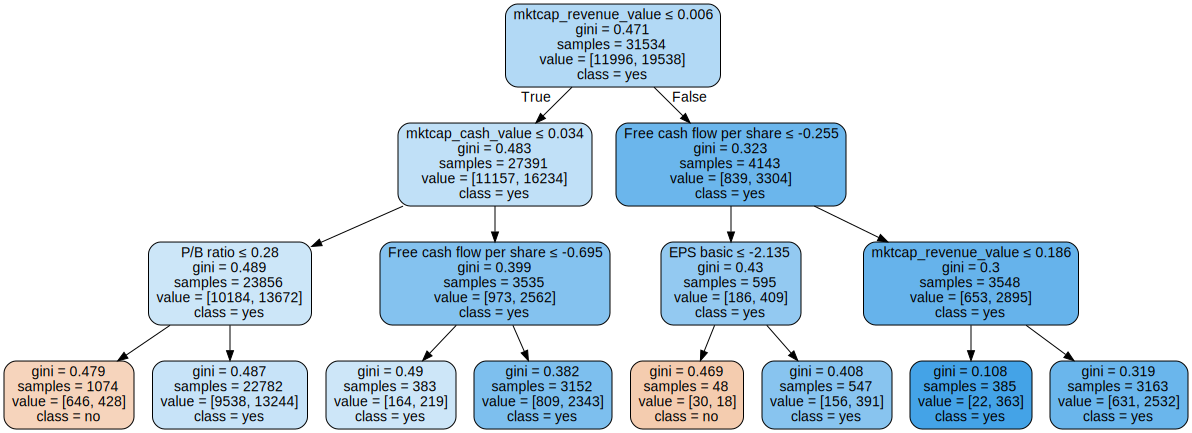

In [45]:
#run the selected model again before executing this

#plot the decision tree
dot_data = tree.export_graphviz(
    dtc_model, out_file=None, 
    feature_names=parameters_columns,  
    class_names=target_values,  
    filled=True, rounded=True,  
    special_characters=True)  

#change file name
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('DT_1yr_3L.png')

graph = graphviz.Source(dot_data)  
graph